In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

: 

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df = pd.read_csv("Hospital_Indonesia_datasets.csv", sep=';')

df.head(100)


: 

In [ ]:
# ============================================================
# 3. CEK MISSING VALUE & INFO DATASET
# ============================================================
print(df.info())
print(df.isnull().sum())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  3155 non-null   int64 
 1   nama                3155 non-null   object
 2   propinsi            3155 non-null   object
 3   kab                 3155 non-null   object
 4   alamat              3155 non-null   object
 5   jenis               3155 non-null   object
 6   kelas               3155 non-null   object
 7   status_blu          3155 non-null   object
 8   kepemilikan         3155 non-null   object
 9   total_tempat_tidur  3155 non-null   int64 
 10  total_layanan       3155 non-null   int64 
 11  total_tenaga_kerja  3155 non-null   int64 
dtypes: int64(4), object(8)
memory usage: 295.9+ KB
None
id                    0
nama                  0
propinsi              0
kab                   0
alamat                0
jenis                 0
kelas               

id  total_tempat_tidur  total_layanan  total_tenaga_kerja
count  3.155000e+03         3155.000000    3155.000000         3155.000000
mean   3.803327e+06          135.433914      41.097306          261.980666
std    2.005303e+06          550.960235      30.583893          382.352731
min    1.101015e+06            0.000000       1.000000            0.000000
25%    3.171859e+06           54.000000      22.000000           56.500000
50%    3.325039e+06          102.000000      31.000000          153.000000
75%    5.103046e+06          155.000000      50.000000          335.000000
max    9.271080e+06        30343.000000     419.000000         7939.000000

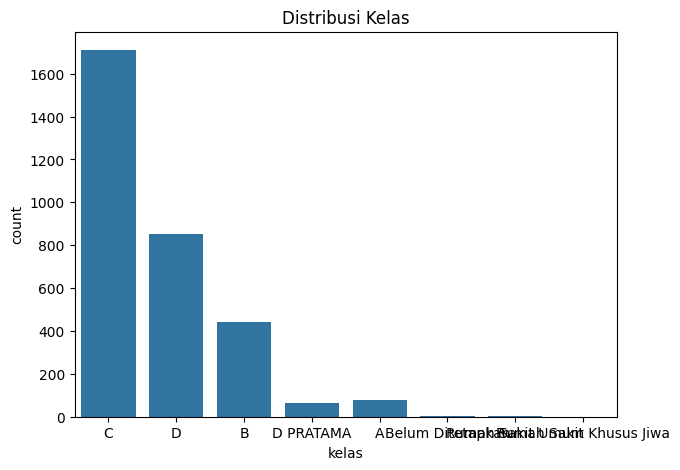

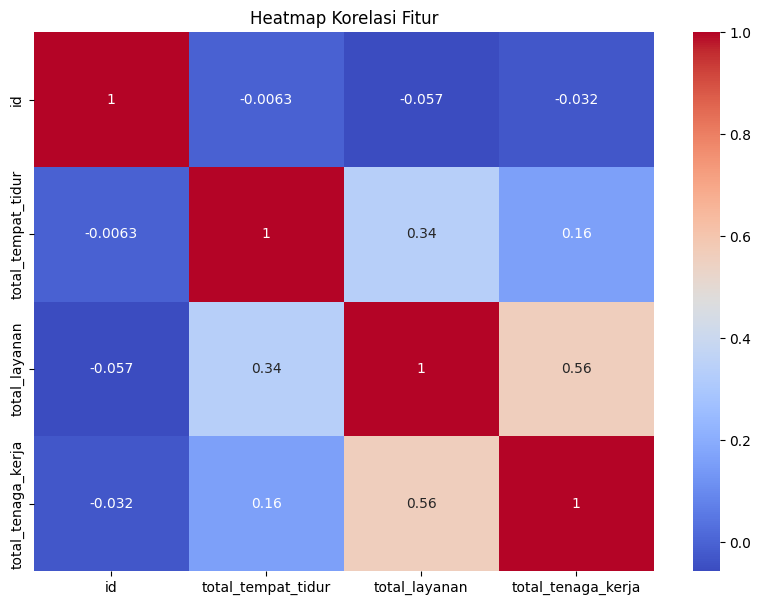

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafik jumlah kelas
plt.figure(figsize=(7,5))
sns.countplot(x=df['kelas'])
plt.title("Distribusi Kelas")
plt.show()

# Heatmap korelasi numerik
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur")
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in df.columns:
    if df[col].dtype == object:
        df[col] = encoder.fit_transform(df[col])

df.head()


id  nama  propinsi  kab  alamat  jenis  kelas  status_blu  \
0  1110053    75         0  210    2043     20      3           6   
1  1106014  2308         0    7    2812     20      4           6   
2  1171110  1946         0  172    2677     20      1           2   
3  1171163   255         0  172    2079      7      1           1   
4  1102027  1881         0  250      38     20      3           2   

   kepemilikan  total_tempat_tidur  total_layanan  total_tenaga_kerja  
0           18                 218             36                 328  
1           18                  45             15                  45  
2           14                 310             77                 487  
3            3                  11             24                   0  
4           14                 189             34                 537

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["kelas"])
y = df["kelas"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print("=== AKURASI MODEL ===")
print(accuracy_score(y_test, y_pred))

print("\n=== CLASSIFICATION REPORT ===")
print(classification_report(y_test, y_pred))

print("\n=== CONFUSION MATRIX ===")
cm = confusion_matrix(y_test, y_pred)
print(cm)


=== AKURASI MODEL ===
0.8748019017432647

=== CLASSIFICATION REPORT ===
              precision    recall  f1-score   support

           0       0.75      0.64      0.69        14
           1       0.83      0.70      0.76       100
           2       0.00      0.00      0.00         1
           3       0.88      0.94      0.91       344
           4       0.89      0.90      0.89       155
           5       0.82      0.53      0.64        17

    accuracy                           0.87       631
   macro avg       0.70      0.62      0.65       631
weighted avg       0.87      0.87      0.87       631


=== CONFUSION MATRIX ===
[[  9   3   0   2   0   0]
 [  3  70   0  27   0   0]
 [  0   0   0   0   1   0]
 [  0  11   0 325   8   0]
 [  0   0   0  14 139   2]
 [  0   0   0   0   8   9]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


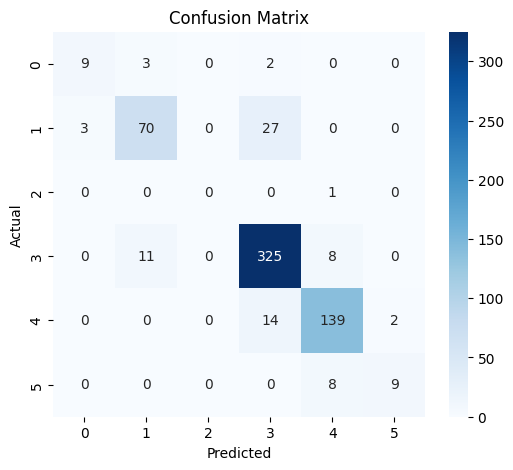

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

print("\n=== CROSS VALIDATION (5-FOLD) ===")
print("Score per Fold:", cv_scores)
print("Rata-rata Akurasi:", cv_scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



=== CROSS VALIDATION (5-FOLD) ===
Score per Fold: [0.87797147 0.90174326 0.86529319 0.88431062 0.61806656]
Rata-rata Akurasi: 0.8294770206022187


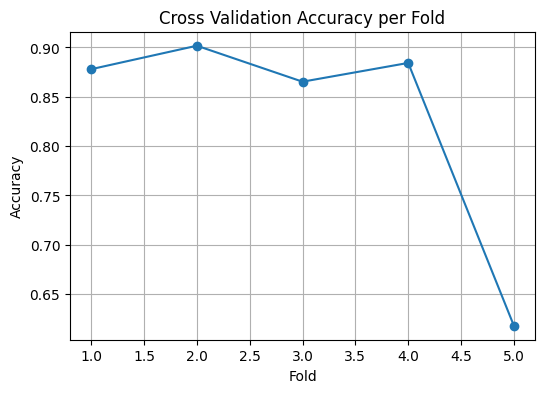

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title("Cross Validation Accuracy per Fold")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
